# Lead Assignment

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
<br><br>Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.<br><br> 
To make this process more efficient, the company wishes to identify the most potential leads, also known as <b>‘Hot Leads’</b>. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:<br><br>

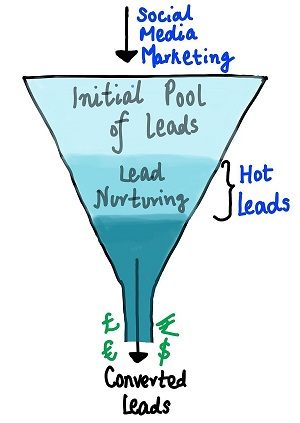
<br><br>
<b>The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.</b>

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data set
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# exploring the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
# looking for the datatypes and other information of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# shape
df.shape

(9240, 37)

Clearly, there are 37 columns and 9240 columns.

In [6]:
# check for duplicates 
df["Prospect ID"].nunique()

9240

In [7]:
# check for duplicates
df["Lead Number"].nunique()

9240

Clearly, there are no duplicates in the Prospect ID and Lead Number columns. Thus, they can be dropped as there absence will not impact our analysis.

## Exploratory Data Analysis

### Data Cleaning and Treatment

In [8]:
# dropping Propect ID and Lead Number columns as they do not impact our analysis
df.drop(['Prospect ID', 'Lead Number'], axis= 1, inplace= True)

In [9]:
# columns in the data set
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# standardizing column names
df.columns= ['_'.join(n.lower().split()[:3]) for n in df.columns]

# standardising categorical values
cat_col = df.select_dtypes(include=['object']).columns
df[cat_col]= df[cat_col].apply(lambda x: x.str.lower().str.replace(' ', '_').str.strip())

In [11]:
# taking a look at the unique entries of different columns
for col in df.columns:
    print(col.upper(), end=': ')
    print(df[col].unique())
    print()

LEAD_ORIGIN: ['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']

LEAD_SOURCE: ['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']

DO_NOT_EMAIL: ['no' 'yes']

DO_NOT_CALL: ['no' 'yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL_TIME_SPENT: [   0  674 1532 ...  603  483  927]

PAGE_VIEWS_PER: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.  

Clearly, there are a few columns which contain repeated values. 
<br>
Some of the inconsistencies are as follows:
1. `tags`: "invalid number" and "wrong number given" are same.
2. `country`: nan and "unknown" are same from analysis point of view.
3. `lead_source`: WeLearn and WeLearnblog_home are one and the same.
4. `last_activity` and `last_notable_activity` are highly correlated as evident from the unique values. Thus, it is safe to drop one of them.
5. There are some variables which contain only a single category and thus, are redundant in nature.
6. There are categorical variables which contain "Select" level, which is same as nan values.

In [12]:
# removing redundant columns
df.drop(['receive_more_updates', 'update_me_on', 'get_updates_on', 'i_agree_to', 'last_activity', 'magazine'], 
        axis=1, inplace= True)

In [13]:
# replacing all 'select' levels in different categorical columns with NaN
df= df.replace('select', np.nan)

In [14]:
# replacing "wrong number given" with "invalid number"
df.tags= df.tags.replace("wrong_number_given", "invalid_number")

#### Restructuring lead_source column

In [15]:
# value counts for the column lead source
df.lead_source.value_counts()

google               2873
direct_traffic       2543
olark_chat           1755
organic_search       1154
reference             534
welingak_website      142
referral_sites        125
facebook               55
bing                    6
click2call              4
social_media            2
live_chat               2
press_release           2
pay_per_click_ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: lead_source, dtype: int64

Clearly, there is a need to categories with less frequent values as others. This is so because they do not add any significant value to our analysis.

In [16]:
# Values with less than 50 occurrences shall be classified as others
value_counts= df.lead_source.value_counts()
df.lead_source=  df.lead_source.replace(value_counts[value_counts<50].index, "others")

#### Restructuring Country column

In [17]:
# value counts for the column country
df.country.value_counts()

india                   6492
united_states             69
united_arab_emirates      53
singapore                 24
saudi_arabia              21
united_kingdom            15
australia                 13
qatar                     10
hong_kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south_africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific_region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

Clearly, we can safely label all the values which other than "India" as "Others".

In [18]:
# Categorising the values of Country variables as India and Others.
value_counts= df.country.value_counts()
df.country= df.country.replace(value_counts[value_counts<80].index, "others")

In [19]:
# finding the number of unique entries in each of the column
df.nunique()

lead_origin                       5
lead_source                       9
do_not_email                      2
do_not_call                       2
converted                         2
totalvisits                      41
total_time_spent               1731
page_views_per                  114
country                           2
specialization                   18
how_did_you                       9
what_is_your                      6
what_matters_most                 3
search                            2
newspaper_article                 2
x_education_forums                2
newspaper                         2
digital_advertisement             2
through_recommendations           2
tags                             25
lead_quality                      5
lead_profile                      5
city                              6
asymmetrique_activity_index       3
asymmetrique_profile_index        3
asymmetrique_activity_score      12
asymmetrique_profile_score       10
a_free_copy                 

#### Dealing with columns with high percentage of NaN values 

In [20]:
# Percentage of NA values in every column
round((df.isna().sum().sort_values(ascending= False)/len(df))*100, 2)

how_did_you                    78.46
lead_profile                   74.19
lead_quality                   51.59
asymmetrique_profile_score     45.65
asymmetrique_activity_score    45.65
asymmetrique_profile_index     45.65
asymmetrique_activity_index    45.65
city                           39.71
specialization                 36.58
tags                           36.29
what_matters_most              29.32
what_is_your                   29.11
country                        26.63
page_views_per                  1.48
totalvisits                     1.48
lead_source                     0.39
a_free_copy                     0.00
lead_origin                     0.00
newspaper_article               0.00
through_recommendations         0.00
digital_advertisement           0.00
newspaper                       0.00
x_education_forums              0.00
search                          0.00
total_time_spent                0.00
converted                       0.00
do_not_call                     0.00
d

In [21]:
# dropping the columns how_did_you and lead_profile as they contain a lot of null values.
df.drop(['how_did_you', 'lead_profile'], axis=1, inplace= True)

In [22]:
# From the unique values, we would like to use the "asymmetrique_activity_index" and "asymmetrique_profile_index"
# We shall drop "asymmetrique_profile_score" and "asymmetrique_activity_score"
df.drop(['asymmetrique_activity_score', 'asymmetrique_profile_score'], axis= 1, inplace= True)

##### Imputing values in the columns which seems to be of value.

In [23]:
# Column "lead_quality" has a 52% null value. We'll classify them as "not_sure"
df.lead_quality.fillna("not_sure", inplace= True)
print(df.lead_quality.value_counts())

not_sure             5859
might_be             1560
high_in_relevance     637
worst                 601
low_in_relevance      583
Name: lead_quality, dtype: int64


In [24]:
# asymmetrique_profile_index and asymmetrique_activity_index
# initial values in the category are no primary use and hence, we choose to remove it
df["asymmetrique_activity_index"]= df["asymmetrique_activity_index"].str[3:]
df["asymmetrique_profile_index"]= df["asymmetrique_profile_index"].str[3:]
# Using mode to impute the columns
df["asymmetrique_activity_index"].fillna(df["asymmetrique_activity_index"].mode().values[0], inplace= True)
df["asymmetrique_profile_index"].fillna(df["asymmetrique_profile_index"].mode().values[0], inplace= True)

##### Understanding country and city columns

In [25]:
# understanding the city and country label
print("City labelling for different countries: \n")
for i in df.country.dropna().unique():
    print(i.upper())
    print(df[df.country == i]['city'].value_counts())
    print("\n")

print("Country labelling for different cities: \n")
for j in df.city.dropna().unique():
    print(j.upper())
    print(df[df.city == j]['country'].value_counts())
    print("\n")

City labelling for different countries: 

INDIA
mumbai                         2918
thane_&_outskirts               651
other_cities                    564
other_cities_of_maharashtra     391
other_metro_cities              345
tier_ii_cities                   69
Name: city, dtype: int64


OTHERS
mumbai                         93
other_cities                   67
other_cities_of_maharashtra    23
thane_&_outskirts              21
other_metro_cities             20
tier_ii_cities                  3
Name: city, dtype: int64


Country labelling for different cities: 

MUMBAI
india     2918
others      93
Name: country, dtype: int64


THANE_&_OUTSKIRTS
india     651
others     21
Name: country, dtype: int64


OTHER_METRO_CITIES
india     345
others     20
Name: country, dtype: int64


OTHER_CITIES
india     564
others     67
Name: country, dtype: int64


OTHER_CITIES_OF_MAHARASHTRA
india     391
others     23
Name: country, dtype: int64


TIER_II_CITIES
india     69
others     3
Name: count

Clearly some of the customers who hail from countries outside India have wrongly marked some of the domestic cities.

In [26]:
# Imputing values and correcting the discrepancies of the columns labelled Country and City
# Assigning the value of "international" for countries labelled as "others"
df.city[df.country== "others"]= df.city[df.country=="others"].replace(df.city[df.country == "others"].unique(), 
                                                                      "international")
# Assuming that the country of residence cannot be other than India if we have a domestic city label in the row
# Assigning the rows with a domestic city label with the country label of India. 

df.country[(df.city != "international") & ~df.city.isna()] = "india"

# Assuming that rows with a country label 'india' will have most frequently occuring city label

df.city[(df.country == "india") & (df.city.isna())] = "mumbai"

In [27]:
# Checking the number of rows where both the city as well as country have nan values
x = len(df[df.city.isna() & df.country.isna()])
print(x)

2055


There are 2055 rows where both the country and city have na values. Lets mark them as unavailable.

In [28]:
df[['city', 'country']] = df[['city', 'country']].fillna('unavailable', axis= 1)

In [29]:
# columns page_views_per, totalvisits and lead_source have less than 2% nan values
# we can drop the respective rows altogether without losing much of data.
df.dropna(subset=['totalvisits', 'page_views_per', 'lead_source'], inplace=True)

In [30]:
# We have numerous nan values in the columns 'what_matters_most', 'specialization', 'tags', 'what_is_your'
# We do not have any logical method to impute values in these columns and hence, we shall drop them.
df.drop(['what_is_your', 'specialization', 'what_matters_most', 'tags'], axis=1, inplace= True)

In [31]:
# percentage of null values in the columns after operation
round((df.isna().sum().sort_values(ascending= False)/len(df))*100, 2)

lead_origin                    0.0
x_education_forums             0.0
a_free_copy                    0.0
asymmetrique_profile_index     0.0
asymmetrique_activity_index    0.0
city                           0.0
lead_quality                   0.0
through_recommendations        0.0
digital_advertisement          0.0
newspaper                      0.0
newspaper_article              0.0
lead_source                    0.0
search                         0.0
country                        0.0
page_views_per                 0.0
total_time_spent               0.0
totalvisits                    0.0
converted                      0.0
do_not_call                    0.0
do_not_email                   0.0
last_notable_activity          0.0
dtype: float64

Clearly, we have removed all the null values in the dataset.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_origin                  9074 non-null   object 
 1   lead_source                  9074 non-null   object 
 2   do_not_email                 9074 non-null   object 
 3   do_not_call                  9074 non-null   object 
 4   converted                    9074 non-null   int64  
 5   totalvisits                  9074 non-null   float64
 6   total_time_spent             9074 non-null   int64  
 7   page_views_per               9074 non-null   float64
 8   country                      9074 non-null   object 
 9   search                       9074 non-null   object 
 10  newspaper_article            9074 non-null   object 
 11  x_education_forums           9074 non-null   object 
 12  newspaper                    9074 non-null   object 
 13  digital_advertisem

## EDA

###  Univariate Analysis

#### Categorical Variables

In [33]:
# user-defined function
def uni_cat_plot(df, x, title):
    plt.figure(figsize= (10,6))
    fontdict={'fontsize': 20, 'fontweight': 5}
    sns.countplot(data= df, y= x, order= df[x].value_counts().index)
    plt.title(title, fontdict)
    plt.xlabel("Value Counts")
    plt.ylabel(x)

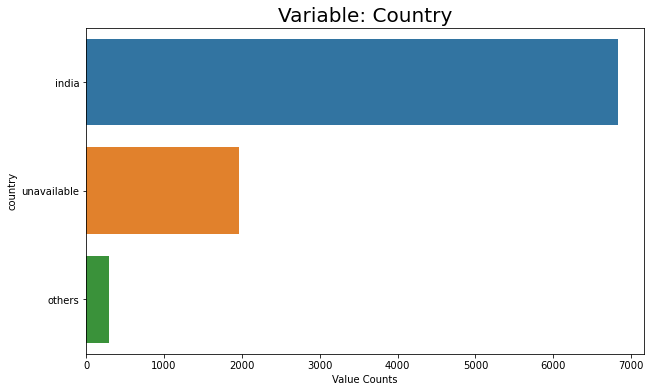

In [34]:
# plotting country variable
uni_cat_plot(df, "country", "Variable: Country")

Majority of leads are from India. Clearly, this column can be dropped.

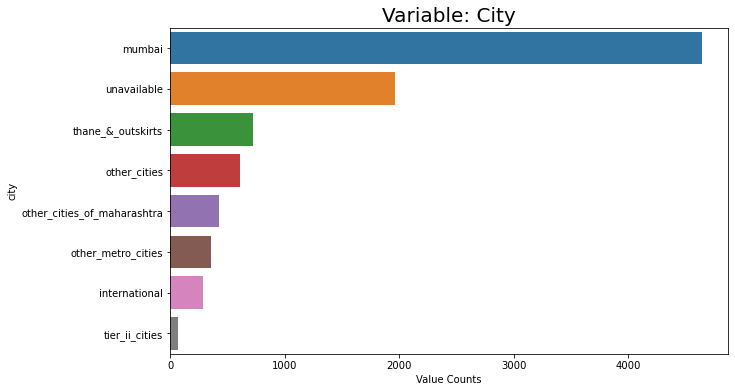

In [35]:
# plotting city variable
uni_cat_plot(df, "city", "Variable: City")

Majority of leads are from Mumbai and other cities of the state of maharashtra.

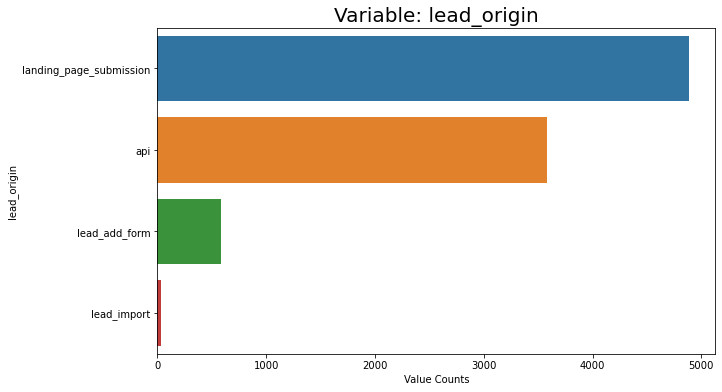

In [36]:
# plotting lead_origin variable
uni_cat_plot(df, "lead_origin", "Variable: lead_origin")

Majority of lead have originated from landing_page_submission.

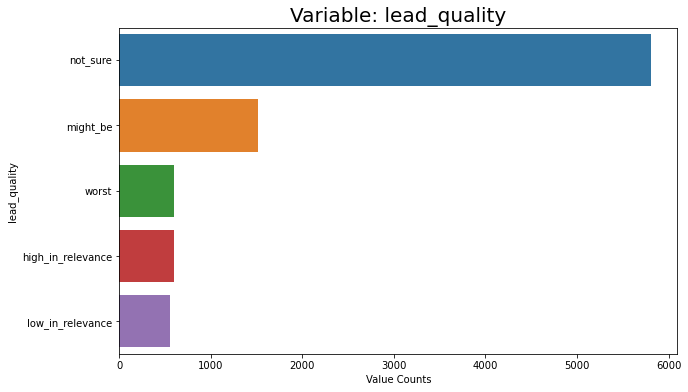

In [37]:
# plotting lead_quality variable
uni_cat_plot(df, "lead_quality", "Variable: lead_quality")

Clearly, majority of the leads belong to the unsure category.

#### Numerical Variables

In [38]:
# user defined function
def uni_num_plot(df, x1, title1, title2):
    plt.figure(figsize=(16, 6))
    fontdict={'fontsize': 20, 'fontweight': 5}
    plt.subplot(1,2,1)
    plt.title(title1, fontdict)
    sns.distplot(df, x = df[x1]) # distribution plot
    plt.xlabel(x1, fontdict)
    plt.ylabel("Density", fontdict)
    plt.subplot(1,2,2)
    plt.title(title2, fontdict)
    sns.boxplot(data= df, x= x1) # box plot
    plt.xlabel(x1, fontdict)

Let's seggregate numerical columns and have a dataset consiting of numerical data. Converted though having an integer data type is a binary column and hence, shall not be analysed under the numerical column.

In [39]:
# data frame with numerical variable 
df_num = df[set(df.describe().columns) - set(["converted"])]
df_num.head()

,page_views_per,total_time_spent,totalvisits
0,0.0,0,0.0
1,2.5,674,5.0
2,2.0,1532,2.0
3,1.0,305,1.0
4,1.0,1428,2.0


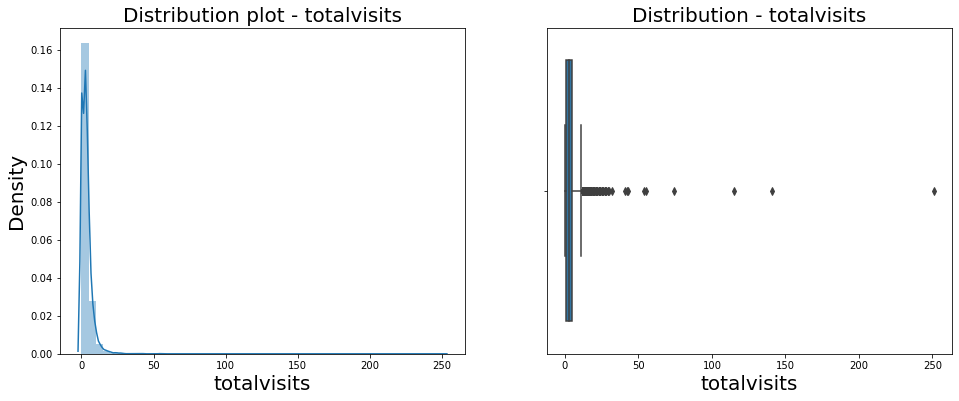

In [40]:
# numerical variable: totalvisits
uni_num_plot(df_num,"totalvisits", "Distribution plot - totalvisits", "Distribution - totalvisits")
plt.show()

Clearly, the data is skewed and there is a presence of outliers in totalvisits variable.

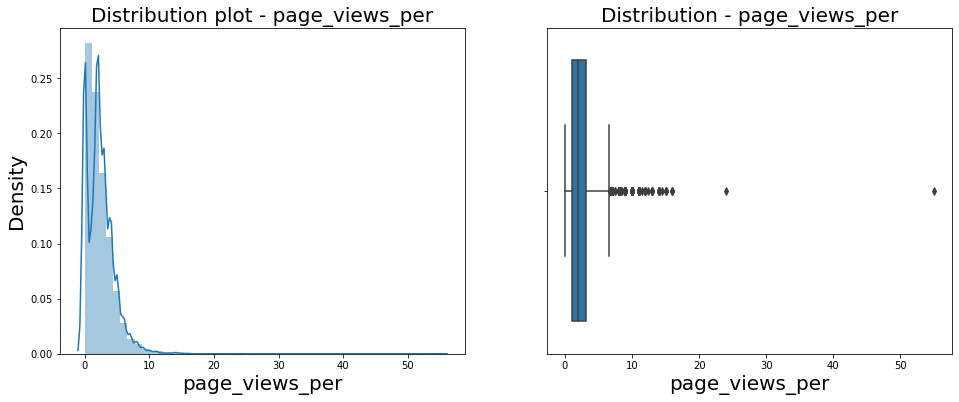

In [41]:
# numerical variable: page_views_per
uni_num_plot(df_num,"page_views_per", "Distribution plot - page_views_per", "Distribution - page_views_per")
plt.show()

There are very few outliers in the page_views_per variable.

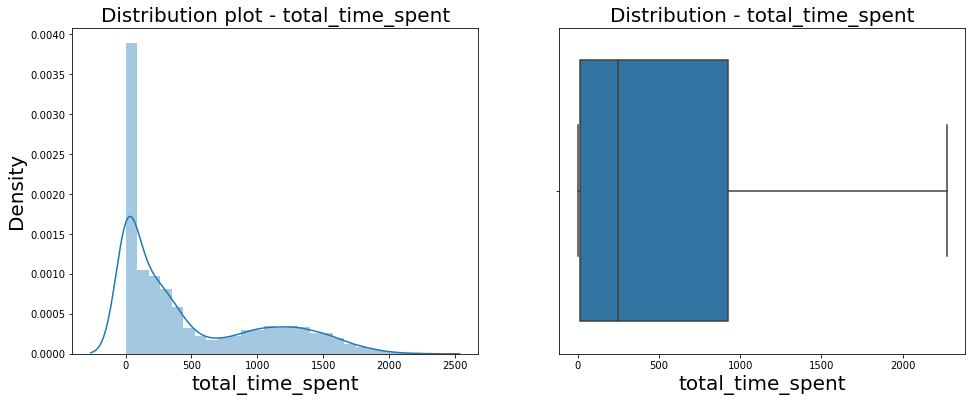

In [42]:
# numerical variable: total_time_spent
uni_num_plot(df_num,"total_time_spent", "Distribution plot - total_time_spent", "Distribution - total_time_spent")
plt.show()

Clearly, we don't see the presence of any outliers in the total_time_spent.

#### Outlier treatment

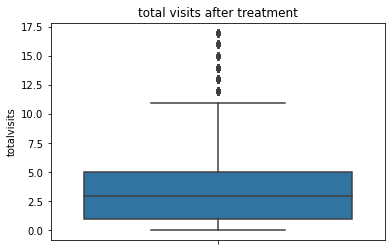

In [43]:
# totalvisits: removing top 1% of data in totalvisits column
rem = df.totalvisits.quantile(0.99)
df =  df[df.totalvisits <= rem]
sns.boxplot(y = df["totalvisits"])
plt.title("total visits after treatment")
plt.show()

### Bivariate Analysis

The target variable is converted. Hence, we will try to analyze other variables with respected to the converted variable.

In [44]:
# columns in the data frame
df.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'converted', 'totalvisits', 'total_time_spent', 'page_views_per',
       'country', 'search', 'newspaper_article', 'x_education_forums',
       'newspaper', 'digital_advertisement', 'through_recommendations',
       'lead_quality', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'a_free_copy', 'last_notable_activity'],
      dtype='object')

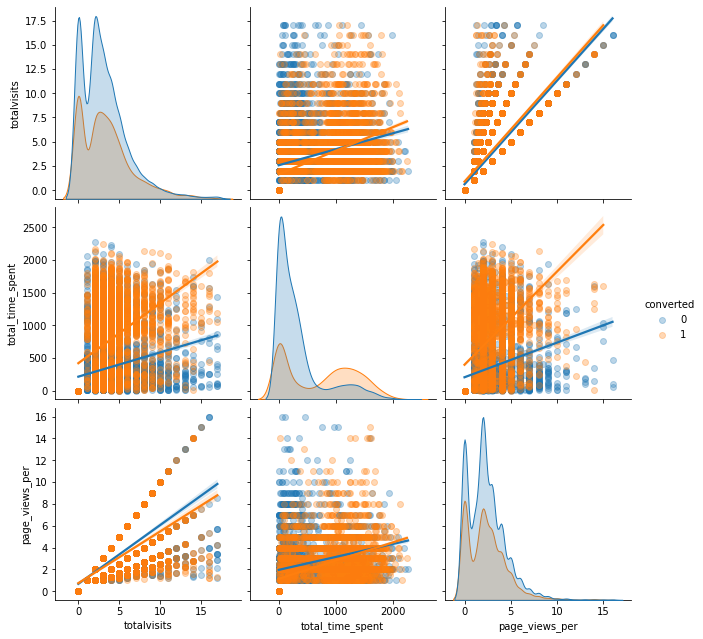

In [45]:
# using pairplot to analyze numerical variables with respect to the target variable
sns.pairplot(data= df, vars= ['totalvisits', 'total_time_spent', 'page_views_per'], hue= "converted", kind= 'reg',
            height= 3, plot_kws= {'scatter_kws': {'alpha': 0.3}})
plt.show()

In [46]:
# user defined function
def cat_tar_plot(df, x1, title):
    fontdict= {'fontsize': 20, 'fontweight': 5}
    sns.countplot(x= x1, hue= 'converted', data= df)
    plt.title(title, fontdict)

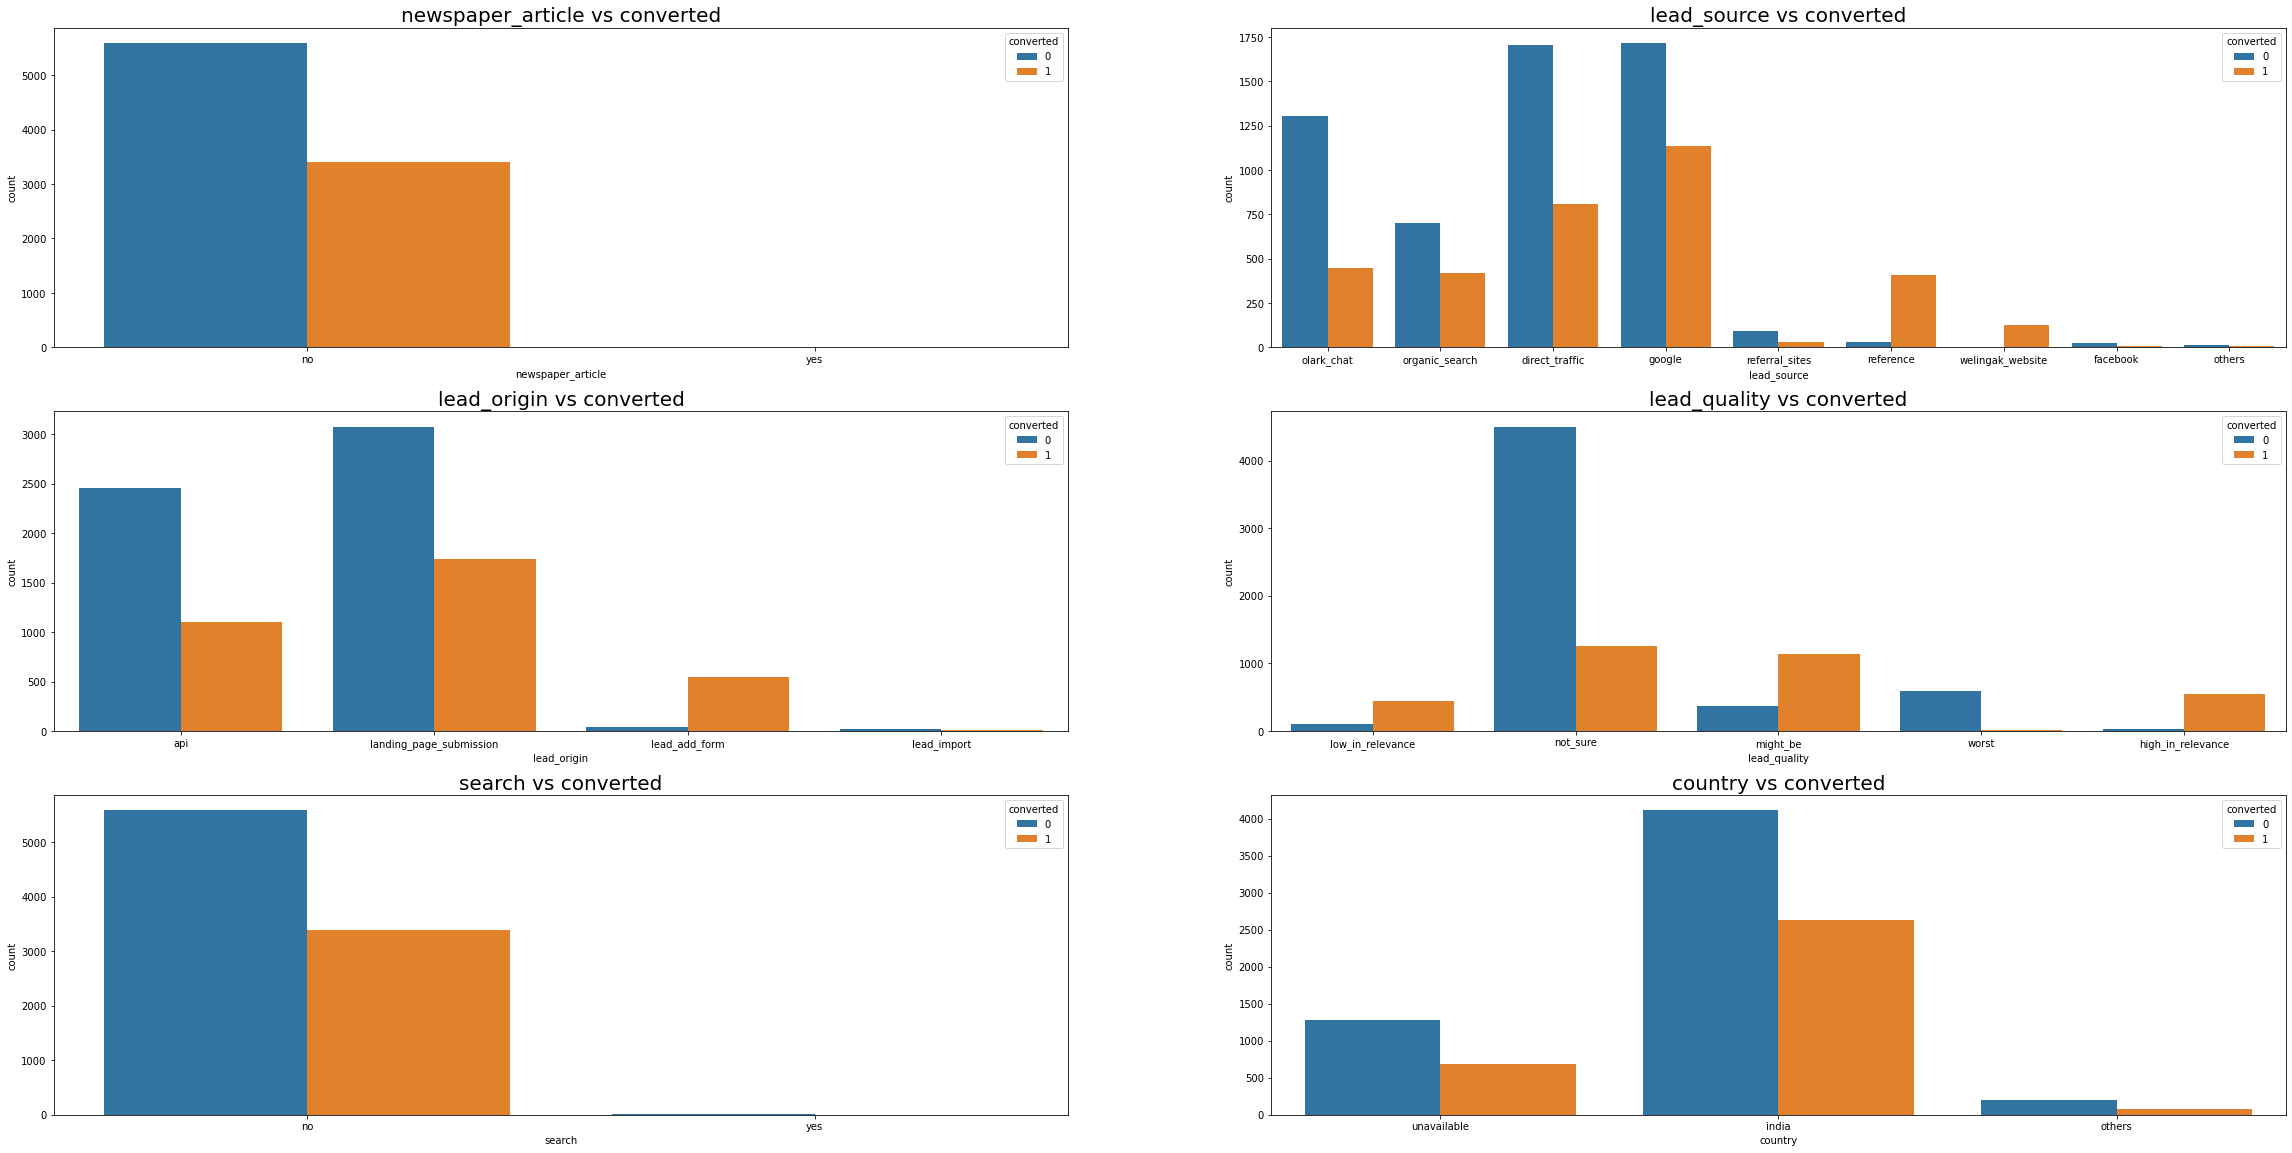

In [47]:
# Bivariate plot analysis
plt.figure(figsize= (40, 20))

# newspaper_article vs converted
plt.subplot(3,2,1)
cat_tar_plot(df, "newspaper_article", "newspaper_article vs converted")

# lead_source vs converted
plt.subplot(3,2,2)
cat_tar_plot(df, "lead_source", "lead_source vs converted")

# lead_origin vs converted
plt.subplot(3,2,3)
cat_tar_plot(df, "lead_origin", "lead_origin vs converted")

# lead_quality vs converted
plt.subplot(3,2,4)
cat_tar_plot(df, "lead_quality", "lead_quality vs converted")

# search vs converted
plt.subplot(3,2,5)
cat_tar_plot(df, "search", "search vs converted")

# country vs converted
plt.subplot(3,2,6)
cat_tar_plot(df, "country", "country vs converted")
plt.show()

#### Multivariate Analysis

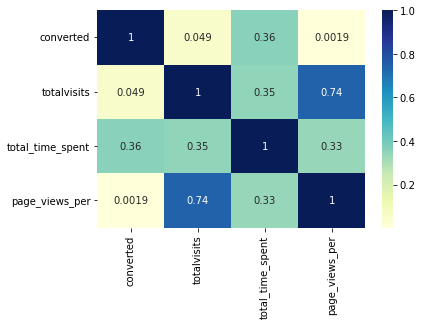

In [48]:
# heatmap of continuous variables and target variable(converted)
sns.heatmap(df.corr(), cmap= "YlGnBu", annot= True)
plt.show()

### Dummy Variable Creation

In [49]:
# dummy variable creation for categorical variables
dummies = pd.get_dummies(df.select_dtypes(include= ['object']), drop_first= True)

# dropping the original columns
df = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
df = pd.concat([df, dummies], axis= 1)
# showing the processed data frame
df.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,...,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# retained amount of data
retained = round((len(df)/9240)*100,2)
print(f"{retained} % of data has been retained after data cleaning.")

97.31 % of data has been retained after data cleaning.


In [51]:
# Shape of the data frame after cleaning
df.shape

(8991, 55)

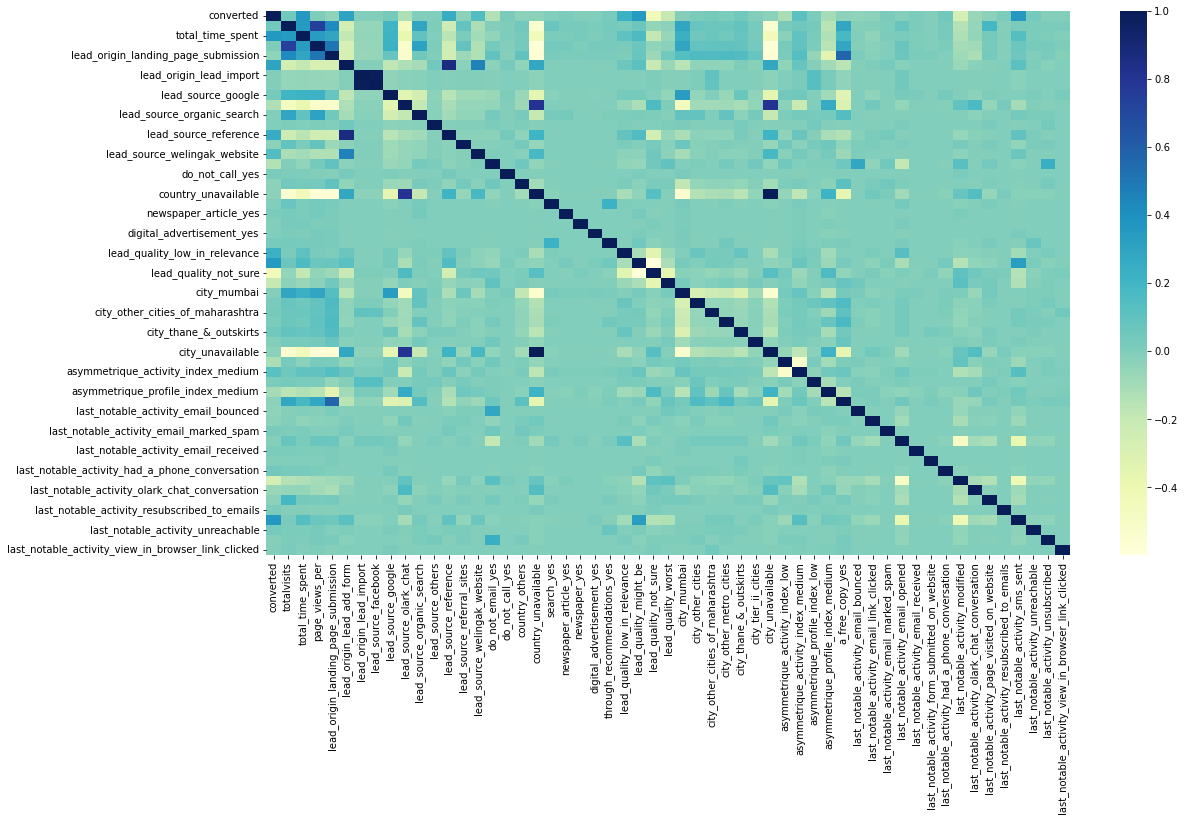

In [52]:
# visualization correlation after creating of dummy variables
plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), cmap= "YlGnBu")
plt.show()

## Building Logistic Regression model

#### Test-Train Split

In [53]:
# importing necessary library
import sklearn
from sklearn.model_selection import train_test_split

In [54]:
# performing test train split of the dataset
df_train, df_test= train_test_split(df, train_size= 0.70, test_size= 0.30, random_state= 100)
# this gives us two dataframes df_train and df_test
print(df_train.shape)
print(df_test.shape)

(6293, 55)
(2698, 55)


In [55]:
# train_dataset
df_train.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,...,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
1467,1,4.0,894,4.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
108,0,6.0,398,3.00,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7858,1,11.0,126,1.22,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5220,1,0.0,0,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3871,0,0.0,0,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# test_dataset
df_test.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,...,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
8692,0,3.0,304,1.5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6126,1,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5198,1,3.0,425,1.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,1,4.0,861,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9225,0,2.0,74,2.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
# X_train and y_train
y_train = df_train.pop('converted')
X_train = df_train
# X_test and y_test
y_test = df_test.pop('converted')
X_test = df_test

##### Scaling the attributes

In [58]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
# Instantiating an object
scaler = MinMaxScaler()
# creating a list of numerical variables
num_var = list(df_num.columns)
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,...,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
1467,0.235294,0.393486,0.25000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
108,0.352941,0.175176,0.18750,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7858,0.647059,0.055458,0.07625,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5220,0.000000,0.000000,0.00000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3871,0.000000,0.000000,0.00000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Model Building

In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [60]:
# RFE
from sklearn.feature_selection import RFE
# Running RFE with 20 variables as output
rfe = RFE(estimator= lr, n_features_to_select= 20)
rfe = rfe.fit(X_train, y_train)

In [61]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('totalvisits', True, 1),
 ('total_time_spent', True, 1),
 ('page_views_per', True, 1),
 ('lead_origin_landing_page_submission', False, 8),
 ('lead_origin_lead_add_form', True, 1),
 ('lead_origin_lead_import', False, 14),
 ('lead_source_facebook', True, 1),
 ('lead_source_google', False, 22),
 ('lead_source_olark_chat', True, 1),
 ('lead_source_organic_search', False, 34),
 ('lead_source_others', False, 17),
 ('lead_source_reference', True, 1),
 ('lead_source_referral_sites', False, 6),
 ('lead_source_welingak_website', True, 1),
 ('do_not_email_yes', True, 1),
 ('do_not_call_yes', False, 2),
 ('country_others', False, 26),
 ('country_unavailable', False, 23),
 ('search_yes', False, 16),
 ('newspaper_article_yes', False, 9),
 ('newspaper_yes', True, 1),
 ('digital_advertisement_yes', False, 28),
 ('through_recommendations_yes', False, 10),
 ('lead_quality_low_in_relevance', True, 1),
 ('lead_quality_might_be', True, 1),
 ('lead_quality_not_sure', True, 1),
 ('lead_quality_worst', True

In [62]:
# RFE selected columns to be stored in variable col
col = X_train.columns[rfe.support_]

##### Applying p value and VIF method

For rejection of a parameter, we would make use of the following:
- p-value should be greater than 0.05.
- VIF should be greater than 5.

In [63]:
# Retaining the RFE selected columns only
X_train = X_train[col]

In [64]:
# Importing necessary libraries
import statsmodels
import statsmodels.api as sm

In [65]:
# user-defined function for generating logistic regression model
def generate_model_summary(X_train):
    # adding constant
    X_train_sm = sm.add_constant(X_train)
    logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
    res = logm1.fit()
    return res.summary()

In [66]:
# running logistic regression
generate_model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2152.4
Date:                Wed, 12 Jul 2023   Deviance:                       4304.8
Time:                        00:01:45   Pearson chi2:                 6.78e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4728
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.9595      0.263      3.655      0.000       0.445       1.474
totalvisits                                        1.7201      0.315      5.453      0.000       1.102       2.338
total_time_spent                                   4.5967      0.189     24.310      0.000       4.226       4.967
page_views_per                                    -2.1031      0.463     -4.539      0.000      -3.011      -1.195
lead_origin_lead_add_form                          1.3310      0.904      1.472      0.141      -0.441       3.103
lead_source_facebook                               0.8483      0.643      1.320      0.187      -0.411       2.108
lead_source_olark_chat                             1.2723      0.135      9.455      0.000       1.009       1.536
lead_source_reference                              1.9996      0.947      2.111      0.035       0.143       3.856
lead_source_welingak_website                       5.7626      1.359      4.239      0.000       3.098       8.427
do_not_email_yes                                  -1.1919      0.189     -6.293      0.000      -1.563      -0.821
newspaper_yes                                    -21.6917   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
lead_quality_low_in_relevance                     -1.0092      0.287     -3.521      0.000      -1.571      -0.447
lead_quality_might_be                             -2.0587      0.259     -7.936      0.000      -2.567      -1.550
lead_quality_not_sure                             -4.0741      0.250    -16.296      0.000      -4.564      -3.584
lead_quality_worst                                -6.1176      0.435    -14.077      0.000      -6.969      -5.266
asymmetrique_activity_index_low                   -1.9207      0.284     -6.772      0.000      -2.477      -1.365
last_notable_activity_had_a_phone_conversation     2.3879      1.271      1.879      0.060      -0.102       4.878
last_notable_activity_olark_chat_conversation     -1.1373      0.353     -3.221      0.001      -1.829      -0.445
last_notable_activity_resubscribed_to_emails      22.4083   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
last_notable_activity_sms_sent                     1.7719      0.089     19.883      0.000       1.597       1.947
last_notable_activity_unreachable                  1.9879      0.617      3.220      0.001       0.778       3.198
==================================================================================================================
"""

In [67]:
# importing Variance inflation factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# user defined function for vif 
def get_vif():
    # making vif dataframe to analyse the values of vif for the variables
    vif = pd.DataFrame()
    vif['Feartures']= X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by= ['VIF'], ascending= False)
    return vif

In [68]:
# obtaining vif for the variables involved
get_vif()

,Feartures,VIF
3,lead_origin_lead_add_form,43.31
6,lead_source_reference,33.86
7,lead_source_welingak_website,10.50
2,page_views_per,5.66
0,totalvisits,4.94
12,lead_quality_not_sure,3.71
1,total_time_spent,2.17
11,lead_quality_might_be,2.01
5,lead_source_olark_chat,1.89
18,last_notable_activity_sms_sent,1.53


Clearly, newspaper_yes has a very high p-value and a low vif. Hence, we choose to remove it first.

In [69]:
# dropping newspaper_yes
X_train.drop('newspaper_yes', axis=1, inplace= True)

In [70]:
# running logistic regression
generate_model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2153.8
Date:                Wed, 12 Jul 2023   Deviance:                       4307.6
Time:                        00:01:46   Pearson chi2:                 6.78e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4726
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.9642      0.262      3.673      0.000       0.450       1.479
totalvisits                                        1.6971      0.315      5.387      0.000       1.080       2.315
total_time_spent                                   4.5848      0.189     24.280      0.000       4.215       4.955
page_views_per                                    -2.0842      0.463     -4.501      0.000      -2.992      -1.177
lead_origin_lead_add_form                          1.3310      0.904      1.473      0.141      -0.440       3.102
lead_source_facebook                               0.8440      0.643      1.313      0.189      -0.416       2.104
lead_source_olark_chat                             1.2685      0.134      9.432      0.000       1.005       1.532
lead_source_reference                              1.9951      0.947      2.107      0.035       0.139       3.851
lead_source_welingak_website                       5.7583      1.359      4.237      0.000       3.095       8.422
do_not_email_yes                                  -1.1910      0.189     -6.291      0.000      -1.562      -0.820
lead_quality_low_in_relevance                     -1.0093      0.287     -3.522      0.000      -1.571      -0.448
lead_quality_might_be                             -2.0586      0.259     -7.938      0.000      -2.567      -1.550
lead_quality_not_sure                             -4.0749      0.250    -16.303      0.000      -4.565      -3.585
lead_quality_worst                                -6.1154      0.434    -14.077      0.000      -6.967      -5.264
asymmetrique_activity_index_low                   -1.9181      0.283     -6.767      0.000      -2.474      -1.363
last_notable_activity_had_a_phone_conversation     2.3864      1.270      1.879      0.060      -0.103       4.876
last_notable_activity_olark_chat_conversation     -1.1333      0.353     -3.212      0.001      -1.825      -0.442
last_notable_activity_resubscribed_to_emails      22.4082   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
last_notable_activity_sms_sent                     1.7725      0.089     19.897      0.000       1.598       1.947
last_notable_activity_unreachable                  1.9883      0.617      3.221      0.001       0.778       3.198
==================================================================================================================
"""

In [71]:
# obtaining vif for the variables involved
get_vif()

,Feartures,VIF
3,lead_origin_lead_add_form,43.31
6,lead_source_reference,33.86
7,lead_source_welingak_website,10.50
2,page_views_per,5.66
0,totalvisits,4.93
11,lead_quality_not_sure,3.71
1,total_time_spent,2.16
10,lead_quality_might_be,2.01
5,lead_source_olark_chat,1.89
17,last_notable_activity_sms_sent,1.53


The variable last_notable_activity_resubscribed_to_emails has a large p value and hence, we choose to remove it.

In [72]:
# dropping variable last_notable_activity_resubscribed_to_emails
X_train.drop('last_notable_activity_resubscribed_to_emails', inplace= True, axis= 1)

In [73]:
# running logistic regression
generate_model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2155.8
Date:                Wed, 12 Jul 2023   Deviance:                       4311.6
Time:                        00:01:47   Pearson chi2:                 6.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4723
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.9646      0.262      3.675      0.000       0.450       1.479
totalvisits                                        1.6955      0.315      5.382      0.000       1.078       2.313
total_time_spent                                   4.5834      0.189     24.278      0.000       4.213       4.953
page_views_per                                    -2.0831      0.463     -4.499      0.000      -2.991      -1.176
lead_origin_lead_add_form                          1.3295      0.903      1.472      0.141      -0.441       3.100
lead_source_facebook                               0.8431      0.643      1.312      0.189      -0.416       2.103
lead_source_olark_chat                             1.2736      0.134      9.475      0.000       1.010       1.537
lead_source_reference                              1.9962      0.947      2.109      0.035       0.141       3.852
lead_source_welingak_website                       5.7587      1.359      4.238      0.000       3.095       8.422
do_not_email_yes                                  -1.1917      0.189     -6.296      0.000      -1.563      -0.821
lead_quality_low_in_relevance                     -1.0098      0.287     -3.524      0.000      -1.571      -0.448
lead_quality_might_be                             -2.0583      0.259     -7.936      0.000      -2.567      -1.550
lead_quality_not_sure                             -4.0735      0.250    -16.297      0.000      -4.563      -3.584
lead_quality_worst                                -6.1158      0.434    -14.078      0.000      -6.967      -5.264
asymmetrique_activity_index_low                   -1.9187      0.283     -6.770      0.000      -2.474      -1.363
last_notable_activity_had_a_phone_conversation     2.3857      1.270      1.878      0.060      -0.104       4.875
last_notable_activity_olark_chat_conversation     -1.1371      0.353     -3.224      0.001      -1.828      -0.446
last_notable_activity_sms_sent                     1.7707      0.089     19.883      0.000       1.596       1.945
last_notable_activity_unreachable                  1.9868      0.617      3.219      0.001       0.777       3.197
==================================================================================================================
"""

In [75]:
get_vif()

,Feartures,VIF
3,lead_origin_lead_add_form,43.31
6,lead_source_reference,33.86
7,lead_source_welingak_website,10.50
2,page_views_per,5.66
0,totalvisits,4.93
11,lead_quality_not_sure,3.71
1,total_time_spent,2.16
10,lead_quality_might_be,2.01
5,lead_source_olark_chat,1.89
16,last_notable_activity_sms_sent,1.53


Now, we have lead_source_facebook as having a high p value.

In [76]:
# dropping variable lead_source_facebook
X_train.drop("lead_source_facebook", axis= 1, inplace= True)

In [77]:
# running logistic regression
generate_model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2156.6
Date:                Wed, 12 Jul 2023   Deviance:                       4313.2
Time:                        00:01:48   Pearson chi2:                 6.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4721
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.0055      0.261      3.856      0.000       0.494       1.517
totalvisits                                        1.6778      0.315      5.335      0.000       1.061       2.294
total_time_spent                                   4.5653      0.188     24.271      0.000       4.197       4.934
page_views_per                                    -2.1176      0.462     -4.579      0.000      -3.024      -1.211
lead_origin_lead_add_form                          1.3166      0.904      1.457      0.145      -0.455       3.088
lead_source_olark_chat                             1.2539      0.133      9.399      0.000       0.992       1.515
lead_source_reference                              1.9869      0.947      2.097      0.036       0.130       3.844
lead_source_welingak_website                       5.7516      1.359      4.231      0.000       3.087       8.416
do_not_email_yes                                  -1.1943      0.189     -6.314      0.000      -1.565      -0.824
lead_quality_low_in_relevance                     -1.0284      0.287     -3.589      0.000      -1.590      -0.467
lead_quality_might_be                             -2.0757      0.259     -7.999      0.000      -2.584      -1.567
lead_quality_not_sure                             -4.0932      0.250    -16.371      0.000      -4.583      -3.603
lead_quality_worst                                -6.1381      0.434    -14.136      0.000      -6.989      -5.287
asymmetrique_activity_index_low                   -1.9222      0.283     -6.783      0.000      -2.478      -1.367
last_notable_activity_had_a_phone_conversation     2.3747      1.269      1.871      0.061      -0.113       4.863
last_notable_activity_olark_chat_conversation     -1.1369      0.352     -3.226      0.001      -1.828      -0.446
last_notable_activity_sms_sent                     1.7673      0.089     19.861      0.000       1.593       1.942
last_notable_activity_unreachable                  1.9829      0.618      3.211      0.001       0.772       3.193
==================================================================================================================
"""

In [78]:
# obtaining vif for the variables involved
get_vif()

,Feartures,VIF
3,lead_origin_lead_add_form,43.31
5,lead_source_reference,33.86
6,lead_source_welingak_website,10.50
2,page_views_per,5.66
0,totalvisits,4.93
10,lead_quality_not_sure,3.68
1,total_time_spent,2.16
9,lead_quality_might_be,2.00
4,lead_source_olark_chat,1.88
15,last_notable_activity_sms_sent,1.53


lead_origin_add_form has not only a high p value but also a high vif value.

In [79]:
# dropping variable lead_origin_lead_add_form
X_train.drop("lead_origin_lead_add_form", inplace=True, axis= 1)

In [80]:
# running logistic regression
generate_model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2157.8
Date:                Wed, 12 Jul 2023   Deviance:                       4315.7
Time:                        00:01:49   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4719
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.0344      0.260      3.977      0.000       0.525       1.544
totalvisits                                        1.6827      0.314      5.361      0.000       1.068       2.298
total_time_spent                                   4.5613      0.188     24.278      0.000       4.193       4.929
page_views_per                                    -2.1555      0.462     -4.668      0.000      -3.061      -1.250
lead_source_olark_chat                             1.2467      0.133      9.367      0.000       0.986       1.508
lead_source_reference                              3.2915      0.304     10.845      0.000       2.697       3.886
lead_source_welingak_website                       7.0592      1.020      6.921      0.000       5.060       9.058
do_not_email_yes                                  -1.1972      0.189     -6.328      0.000      -1.568      -0.826
lead_quality_low_in_relevance                     -1.0423      0.287     -3.636      0.000      -1.604      -0.480
lead_quality_might_be                             -2.0931      0.260     -8.065      0.000      -2.602      -1.584
lead_quality_not_sure                             -4.1124      0.250    -16.444      0.000      -4.603      -3.622
lead_quality_worst                                -6.1599      0.434    -14.187      0.000      -7.011      -5.309
asymmetrique_activity_index_low                   -1.9275      0.284     -6.798      0.000      -2.483      -1.372
last_notable_activity_had_a_phone_conversation     2.3695      1.270      1.866      0.062      -0.119       4.858
last_notable_activity_olark_chat_conversation     -1.1402      0.353     -3.235      0.001      -1.831      -0.449
last_notable_activity_sms_sent                     1.7679      0.089     19.867      0.000       1.593       1.942
last_notable_activity_unreachable                  1.9812      0.618      3.206      0.001       0.770       3.192
==================================================================================================================
"""

In [81]:
# obtaining vif for the variables involved
get_vif()

,Feartures,VIF
2,page_views_per,5.65
0,totalvisits,4.93
9,lead_quality_not_sure,3.68
1,total_time_spent,2.16
8,lead_quality_might_be,2.00
3,lead_source_olark_chat,1.88
14,last_notable_activity_sms_sent,1.53
7,lead_quality_low_in_relevance,1.28
10,lead_quality_worst,1.23
4,lead_source_reference,1.15


pages_views_per has a high vif value.

In [82]:
# dropping variable page_views_per
X_train.drop("page_views_per", axis=1, inplace= True)

In [83]:
# running logistic regression
generate_model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2168.9
Date:                Wed, 12 Jul 2023   Deviance:                       4337.8
Time:                        00:01:49   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4700
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.8418      0.256      3.289      0.001       0.340       1.343
totalvisits                                        0.8367      0.257      3.254      0.001       0.333       1.341
total_time_spent                                   4.5410      0.187     24.278      0.000       4.174       4.908
lead_source_olark_chat                             1.4435      0.127     11.398      0.000       1.195       1.692
lead_source_reference                              3.5027      0.300     11.686      0.000       2.915       4.090
lead_source_welingak_website                       7.2556      1.019      7.120      0.000       5.258       9.253
do_not_email_yes                                  -1.2208      0.189     -6.459      0.000      -1.591      -0.850
lead_quality_low_in_relevance                     -1.0749      0.286     -3.757      0.000      -1.636      -0.514
lead_quality_might_be                             -2.1098      0.259     -8.146      0.000      -2.617      -1.602
lead_quality_not_sure                             -4.1073      0.250    -16.459      0.000      -4.596      -3.618
lead_quality_worst                                -6.1202      0.433    -14.122      0.000      -6.970      -5.271
asymmetrique_activity_index_low                   -1.8901      0.282     -6.695      0.000      -2.443      -1.337
last_notable_activity_had_a_phone_conversation     2.3381      1.280      1.827      0.068      -0.171       4.847
last_notable_activity_olark_chat_conversation     -1.0839      0.349     -3.106      0.002      -1.768      -0.400
last_notable_activity_sms_sent                     1.7267      0.088     19.597      0.000       1.554       1.899
last_notable_activity_unreachable                  1.8860      0.613      3.075      0.002       0.684       3.088
==================================================================================================================
"""

In [84]:
# obtaining vif for the variables involved
get_vif()

,Feartures,VIF
8,lead_quality_not_sure,3.24
0,totalvisits,2.86
1,total_time_spent,2.15
7,lead_quality_might_be,1.90
2,lead_source_olark_chat,1.74
13,last_notable_activity_sms_sent,1.52
6,lead_quality_low_in_relevance,1.24
9,lead_quality_worst,1.19
3,lead_source_reference,1.13
5,do_not_email_yes,1.12


last_notable_activity_had_a_phone_conversation has a high p value.

In [85]:
# dropping variable last_notable_activity_had_a_phone_conversation
X_train.drop("last_notable_activity_had_a_phone_conversation", axis=1, inplace= True)

In [86]:
# running logistic regression
generate_model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2171.2
Date:                Wed, 12 Jul 2023   Deviance:                       4342.4
Time:                        00:01:50   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4697
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.8683      0.256      3.397      0.001       0.367       1.369
totalvisits                                       0.8397      0.257      3.272      0.001       0.337       1.343
total_time_spent                                  4.5345      0.187     24.267      0.000       4.168       4.901
lead_source_olark_chat                            1.4390      0.127     11.370      0.000       1.191       1.687
lead_source_reference                             3.4938      0.300     11.653      0.000       2.906       4.081
lead_source_welingak_website                      7.2522      1.019      7.116      0.000       5.255       9.250
do_not_email_yes                                 -1.2240      0.189     -6.474      0.000      -1.595      -0.853
lead_quality_low_in_relevance                    -1.0990      0.286     -3.846      0.000      -1.659      -0.539
lead_quality_might_be                            -2.1207      0.259     -8.200      0.000      -2.628      -1.614
lead_quality_not_sure                            -4.1286      0.249    -16.566      0.000      -4.617      -3.640
lead_quality_worst                               -6.1431      0.433    -14.183      0.000      -6.992      -5.294
asymmetrique_activity_index_low                  -1.8958      0.282     -6.713      0.000      -2.449      -1.342
last_notable_activity_olark_chat_conversation    -1.0873      0.349     -3.114      0.002      -1.772      -0.403
last_notable_activity_sms_sent                    1.7208      0.088     19.541      0.000       1.548       1.893
last_notable_activity_unreachable                 1.8795      0.614      3.063      0.002       0.677       3.082
=================================================================================================================
"""

In [87]:
# obtaining vif for the variables involved
get_vif()

,Feartures,VIF
8,lead_quality_not_sure,3.24
0,totalvisits,2.86
1,total_time_spent,2.15
7,lead_quality_might_be,1.90
2,lead_source_olark_chat,1.74
12,last_notable_activity_sms_sent,1.52
6,lead_quality_low_in_relevance,1.24
9,lead_quality_worst,1.19
3,lead_source_reference,1.13
5,do_not_email_yes,1.12


Clearly, all the variables have their VIF values and p-values in range. In other words, VIF values are less than 5 and p-values are less than 0.05

### Creating Prediction

In [88]:
# predicting the probabilities on the trian set
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm1.fit()
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

1467    0.920576
108     0.037081
7858    0.967197
5220    0.474889
3871    0.139275
dtype: float64

In [89]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.92057605, 0.03708068, 0.96719745, 0.47488947, 0.13927481,
       0.74925249, 0.13927481, 0.06015141, 0.13927481, 0.07365751])

In [90]:
# dataframe to comparison of probability and the actual values
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.920576
1,0,0.037081
2,1,0.967197
3,1,0.474889
4,0,0.139275


Randomly selecting a cut-off probability of 0.5 to evaluate the model.

In [91]:
# assigning lead_score based on prediction on the train dataset
y_train_pred_final["lead_score"]= y_train_pred_final.Conversion_Prob*100
# assigning 0 or 1 with the cut off as o.5
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,lead_score,Predicted
0,1,0.920576,92.057605,1
1,0,0.037081,3.708068,0
2,1,0.967197,96.719745,1
3,1,0.474889,47.488947,0
4,0,0.139275,13.927481,0


### Model Evaluation

In [92]:
# importing necessary modules
from sklearn import metrics
# creating confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3578,  348],
       [ 603, 1764]], dtype=int64)

|Actual\Predicted|No|Yes|
|---|---|---|
|No|3578|348|
|Yes|603|1764|

### Evaluation Metrics
The following metrics have been used:
1. Sensitivity(Recall): percentage of leads that were converted and correctly identified as converted.
2. Specificity: percentage of leads that were not converted and correctly identified as such.
3. Precison: effectiveness of the model when the prediction is positive.
4. F1 score: weighted average of the precision and recall.

When the correct identification of positives is important to us, we should choose a model with higher Sensitivity. However, if correct identification of negatives is important, we should choose a model with higher specificity.

In [93]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score
# function to obtain all the metric    
def get_metrics(actual, predicted):
    # confusion matrix
    confusion= metrics.confusion_matrix(actual, predicted)
    TP = confusion[1,1] # True positive 
    TN = confusion[0,0] # True negative
    FP = confusion[0,1] # False positive
    FN = confusion[1,0] # False negative
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f= f1_score(actual, predicted)
    print(f"Accuracy:{(TP+TN)/(TP+TN+FP+FN)}")
    print(f"Sensitivity(Recall): {recall}\nSpecificity: {TN/(TN+TP)}\nPrecision: {precision}\nF-Score: {f}")

At a random cut-off of probability of 0.5: we have achieved a 85% accuracy, 75%(approx.) sensitivity and 91% specificity.

In [94]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

Accuracy:0.848879707611632
Sensitivity(Recall): 0.7452471482889734
Specificity: 0.6697865967802321
Precision: 0.8352272727272727
F-Score: 0.7876758204956463


### ROC Curve

In [95]:
# Function to draw ROC
def draw_roc_curve(actual, probs):
    fpr, tpr, thresholds= metrics.roc_curve(actual, probs, drop_intermediate= False)
    auc_score= metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label= "ROC curve(area= %0.2f)" % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1- True Negative Rate)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc= "lower right")

In [96]:
fpr, tpr, thresholds= metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                        drop_intermediate= False)

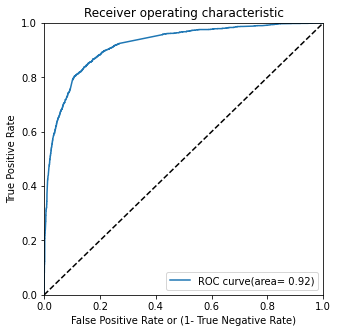

In [97]:
# ROC curve
draw_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.show()

The area under ROC curve is 0.92  which is a very good value.

### Finding optimal probability cut-off

In [98]:
# creating columns with different probability cut-offs
num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,lead_score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.920576,92.057605,1,1,1,1,1,1,1,1,1,1,1
1,0,0.037081,3.708068,0,1,0,0,0,0,0,0,0,0,0
2,1,0.967197,96.719745,1,1,1,1,1,1,1,1,1,1,1
3,1,0.474889,47.488947,0,1,1,1,1,1,0,0,0,0,0
4,0,0.139275,13.927481,0,1,1,0,0,0,0,0,0,0,0


In [99]:
# dataframe to analyse the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
df_cutoff = pd.DataFrame(columns= ['prob', 'accuracy', 'sensi', 'speci'])
# Making confusion matrix to find values of sensitivity, specificity, and accuracy
from sklearn.metrics import confusion_matrix
for i in num: 
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    df_cutoff.loc[i] = [i, accuracy, sensi, speci]
df_cutoff

,prob,accuracy,sensi,speci
0.0,0.0,0.376132,1.000000,0.000000
0.1,0.1,0.693151,0.963245,0.530311
0.2,0.2,0.816304,0.909168,0.760316
0.3,0.3,0.840775,0.866075,0.825522
0.4,0.4,0.853647,0.817068,0.875700
0.5,0.5,0.848880,0.745247,0.911360
0.6,0.6,0.843795,0.695395,0.933265
0.7,0.7,0.835373,0.641741,0.952114
0.8,0.8,0.812649,0.546261,0.973255
0.9,0.9,0.769903,0.407267,0.988538


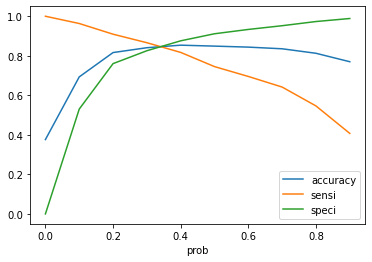

In [100]:
# Plot
df_cutoff.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

From the graph, it is visible that the optimal cut-off is at 0.37.

In [101]:
# Adding final predicted column based on the cut-off
y_train_pred_final["final_predicted"]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,lead_score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.920576,92.057605,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.037081,3.708068,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.967197,96.719745,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.474889,47.488947,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.139275,13.927481,0,1,1,0,0,0,0,0,0,0,0,0


In [102]:
# confusion matrix
confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

array([[3384,  542],
       [ 405, 1962]], dtype=int64)

|Actual\Predicted|No|Yes|
|---|---|---|
|No|3384|542|
|Yes|405|1962|

In [103]:
# Evaluation metrics
get_metrics(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Accuracy:0.8495153344986492
Sensitivity(Recall): 0.8288973384030418
Specificity: 0.632996632996633
Precision: 0.7835463258785943
F-Score: 0.8055840689796756


Clearly, at the cut-off of 0.37, we have achieved an accuracy of 85%, sensitivity(Recall) of 83%, specificity of 63%, precision of 78.3%, and a F-score of 0.8055.

### Prediction on Test set

In [104]:
# numerical columns
num_var

['page_views_per', 'total_time_spent', 'totalvisits']

In [105]:
# X_test
X_test.head()

,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,...,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
8692,3.0,304,1.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6126,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5198,3.0,425,1.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,4.0,861,4.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9225,2.0,74,2.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [106]:
# scaling numerical values
X_test[num_var] = scaler.transform(X_test[num_var])

In [107]:
required_col = X_train.columns

In [108]:
# Preparing X_test for predicition
X_test = X_test[required_col]
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [109]:
# prediction of test_set
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)
# rename 
y_pred_final= y_pred_final.rename(columns= {0: 'Conversion_Prob'})
y_pred_final.head()

,converted,Conversion_Prob
0,0,0.313337
1,1,0.981334
2,1,0.094160
3,1,0.593028
4,0,0.002164


In [110]:
# Using the cutoff probability of 0.37
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x> 0.37 else 0)
y_pred_final

,converted,Conversion_Prob,final_predicted
0,0,0.313337,0
1,1,0.981334,1
2,1,0.094160,0
3,1,0.593028,1
4,0,0.002164,0
...,...,...,...
2693,0,0.455184,1
2694,1,0.329991,0
2695,0,0.021126,0
2696,0,0.257421,0


In [111]:
# Confusion matrix
confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted)

array([[1415,  251],
       [ 169,  863]], dtype=int64)

|Actual\Predicted|No|Yes|
|---|---|---|
|No|1415|251|
|Yes|169|863|

### Metrics associated with prediction on test dataset

In [112]:
# evaluation matrix
get_metrics(y_pred_final.converted, y_pred_final.final_predicted)

Accuracy:0.8443291326908822
Sensitivity(Recall): 0.8362403100775194
Specificity: 0.6211589113257243
Precision: 0.774685816876122
F-Score: 0.804287045666356


Clearly, with the probability cut-off of 0.37, we have achieved an accuracy of around 84.6%, sensitivity(Recall) of 83.6%, specificity of around 62%, precision of around 78% and F-score of 0.806.

###  Precision and recall tradeoff

In [113]:
# importing precision_recall_curve
from sklearn.metrics import precision_recall_curve
# Function to drow precision recall curve    
def draw_precision_recall_curve(actual, pred_prob):
    p, r, thresholds = precision_recall_curve(actual, pred_prob)
    plt.plot(thresholds, p[:-1], "b-", label= "Precision")
    plt.plot(thresholds, r[:-1], "r-", label= "Recall")
    plt.title("Precision - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()

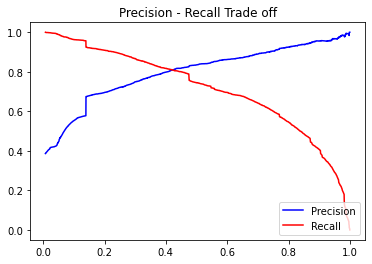

In [114]:
draw_precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Clearly, from the plot above, it appears the cutoff probability is around 0.41

In [115]:
# Adding column containing the final predicion on the test data
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,lead_score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.920576,92.057605,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.037081,3.708068,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.967197,96.719745,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.474889,47.488947,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.139275,13.927481,0,1,1,0,0,0,0,0,0,0,0,0


In [116]:
# confusion matrix
confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

array([[3451,  475],
       [ 441, 1926]], dtype=int64)

|Actual\Predicted|No|Yes|
|---|---|---|
|No|3451|475|
|Yes|441|1926|

In [117]:
# evaluation matrix
get_metrics(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Accuracy:0.8544414428730335
Sensitivity(Recall): 0.8136882129277566
Specificity: 0.6418076994606658
Precision: 0.8021657642648896
F-Score: 0.8078859060402683


With cutoff probability at 0.41, we have an accuracy of 85%, sensitivity(recall) of around 81%, specificity of 64.2%, precision of 80.3% and F-score of 0.808

### Prediction on Test set

In [118]:
# Changing the threshold to 0.41 in the dataframe obtained above
# Using the cutoff probability of 0.37
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x> 0.41 else 0)
y_pred_final

,converted,Conversion_Prob,final_predicted
0,0,0.313337,0
1,1,0.981334,1
2,1,0.094160,0
3,1,0.593028,1
4,0,0.002164,0
...,...,...,...
2693,0,0.455184,1
2694,1,0.329991,0
2695,0,0.021126,0
2696,0,0.257421,0


In [119]:
# confusion matrix
confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted)

array([[1446,  220],
       [ 186,  846]], dtype=int64)

|Actual\Predicted|No|Yes|
|---|---|---|
|No|1446|220|
|Yes|185|847|

In [120]:
# evaluation metrics
get_metrics(y_pred_final.converted, y_pred_final.final_predicted)

Accuracy:0.8495181616011861
Sensitivity(Recall): 0.8197674418604651
Specificity: 0.6308900523560209
Precision: 0.7936210131332082
F-Score: 0.8064823641563392


At a threshold probability of 0.41, we have achieved an accuracy of around 84.9%, Sensitivity(recall) of around 82%, Specificity of 63%, Precision of 79.4%, and F-score of around 0.807

Clearly, the model is able to predict the Conversion rate successfully. An overall accuracy of about 85% on our logistic regression model suggests there is an 85% chance that our predicted leads will be converted. This meets our CEO's target of atleast 80% lead conversion.

### Lead Scoring

We will perform lead-scoring on the test set.

In [121]:
# Assigning lead scores to the test data
scores = pd.DataFrame({'actual_outcome': y_pred_final.converted,
                       'predicted_outcome': y_pred_final.final_predicted,
                       'lead_score': (y_pred_final.Conversion_Prob*100).astype('int'), 
                       }).reset_index(drop= True)
scores.head()

,actual_outcome,predicted_outcome,lead_score
0,0,0,31
1,1,1,98
2,1,0,9
3,1,1,59
4,0,0,0
